## Esercitazione 5  del    19 Marzo 2024 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [15]:
import numpy as np
fx=lambda p,q: -p+np.sqrt(p**2+q)
fxprimo=lambda p,q: 1/(2*np.sqrt(p**2+q))

p=10.0**5
q=10.0**(-np.arange(0,11))
#calcolo l'indice di condizionamento della funzione fx
K=np.abs(fxprimo(p,q)*q/fx(p,q))
print("K=",K)
print("--------------------------")
x2=fx(p,q)
print("x2=",x2)
print("--------------------------")



K= [1.00000112 0.99999239 0.99999239 1.00174164 1.01058054 1.14532461
 0.34359738        inf        inf        inf        inf]
--------------------------
x2= [4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
--------------------------


/var/folders/q4/mjc60_153h77rttjvp7nh8mr0000gn/T/ipykernel_1337/332323842.py:8: RuntimeWarning: divide by zero encountered in divide
  K=np.abs(fxprimo(p,q)*q/fx(p,q))


## Esercizio 2

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

spacing [1,2]  2.220446049250313e-16
spacing  1   2.220446049250313e-16
spacing  2   1.1102230246251565e-16
spacing  3   2.7755575615628914e-17
spacing  4   6.938893903907228e-18
spacing  5   1.734723475976807e-18
spacing  6   4.336808689942018e-19
spacing  7   1.0842021724855044e-19
spacing  8   2.710505431213761e-20
spacing  9   6.776263578034403e-21
spacing  10   1.6940658945086007e-21
spacing  11   4.235164736271502e-22


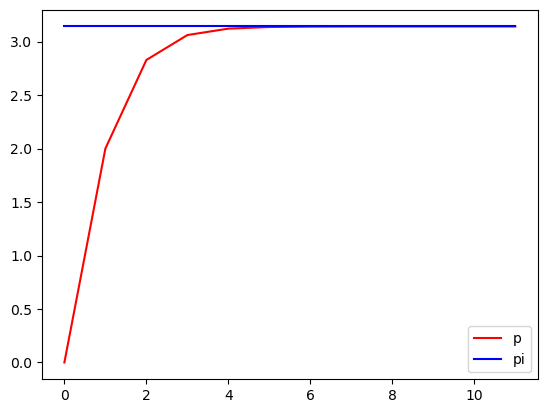

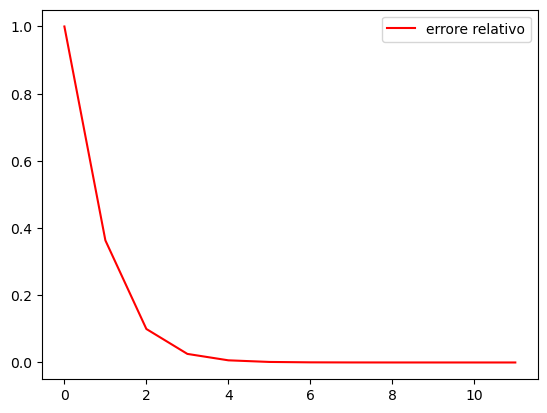

L'algoritmo non è stabile , perchè dal valore di n >= di 25 il valore del pi greco calcolato supera l'effettivo valore di pi greco,
 fino a diventare uguale a 0


In [16]:
import math
import matplotlib.pyplot as plt

n=int(input("Inserisci il numero di iterazioni: "))

b=np.zeros(n)
s=np.zeros(n)
p=np.zeros(n)
b[0]=2

s[0]=1
print("spacing [1,2] " , np.spacing(1))
for i in range(1,n):
    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    print("spacing " , i , " ",  np.spacing(s[i-1]**2))
    s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)


plt.plot(p, label='p', color='red')
plt.plot(math.pi*np.ones(n), label='pi', color='blue')
plt.legend()
plt.show()


#calcolo l'errore relativo
err_rel=np.abs(p-math.pi)/math.pi
plt.plot(err_rel, label='errore relativo', color='red')
plt.legend()
plt.show()

#l'algoritmo non è stabile 
print("L'algoritmo non è stabile , perchè dal valore di n >= di 25 il valore del pi greco calcolato supera l'effettivo valore di pi greco,\n fino a diventare uguale a 0")


## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

n=100
x=np.linspace(-10,10,100)
print("x=",x)

k=np.arange(0,100)
sol=x**k/sp.special.factorial(k)

print("sol=",sol)
print("exp**x=",np.exp(x))

x= [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151

## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

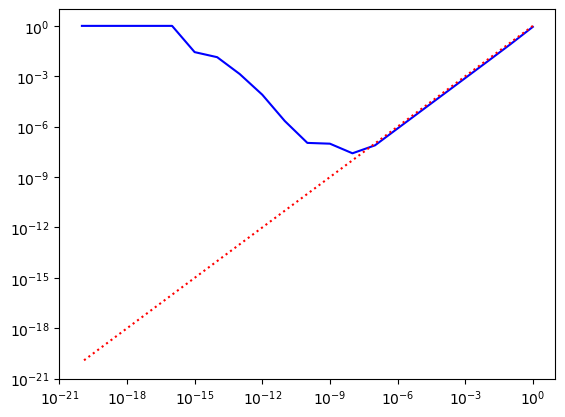

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

n=21
x=1
k=np.arange(0,-n,-1)
h=10.0**k
der=math.cos(1)
calculatedDer=(np.sin(x+h)-np.sin(x))/h
err=np.abs(calculatedDer-der)/np.abs(der)
plt.plot(h,err,'b-',h,h,'r:')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


In [39]:
def HornerValutation(arrTerminiNoti,x):
    n=len(arrTerminiNoti)
    result=arrTerminiNoti[0]
    for i in range(1,n):
        result=result*x+arrTerminiNoti[i]
    return result

In [20]:
def classicMethodForEvaluation(arrTerminiNoti,x):
    n=len(arrTerminiNoti)
    result=0
    for i in range(n):
        result+=arrTerminiNoti[i]*x**i
    return result

first polynomial


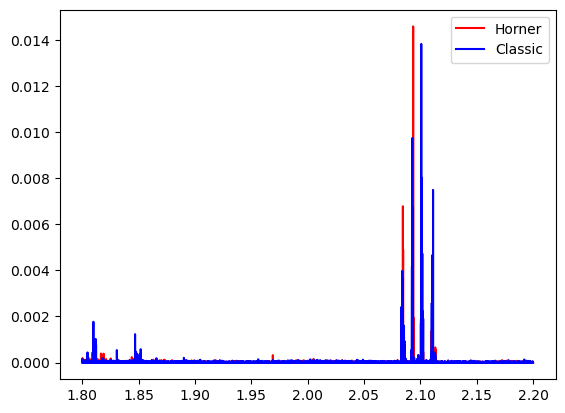

--------------------------
second polynomial


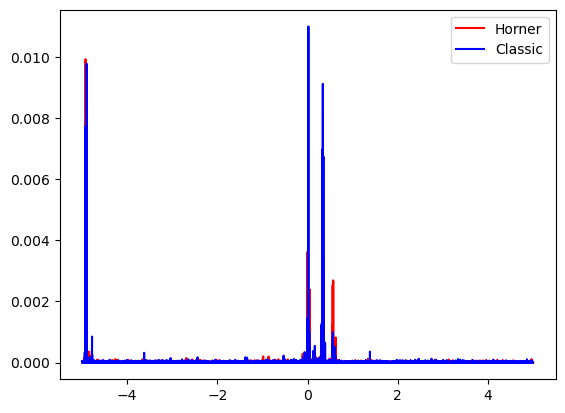

In [23]:
import numpy as np
import time
import matplotlib.pyplot as plt

print("first polynomial")
a=np.array([256, -1024, 1792, -1792, 1120, -448, 112, -16 ,1],dtype=float)
a=np.flip(a)
solutions=np.linspace(1.8,2.2,1000000)
hornerTimes=np.empty(solutions.size)
classicTimes=np.empty(solutions.size)
for i in range(solutions.size):
    start=time.time()
    HornerValutation(a,solutions[i])
    end=time.time()
    hornerTimes[i]=end-start
    start=time.time()
    classicMethodForEvaluation(a,solutions[i])
    end=time.time()
    classicTimes[i]=end-start
plt.plot(solutions,hornerTimes,'r-',label='Horner')
plt.plot(solutions,classicTimes,'b-',label='Classic')
plt.legend()
plt.show()
print("--------------------------")
print("second polynomial")
a=np.array([-8,0,+28,0,0,-7,0,12,-4,0,1],dtype=float)
solutions=np.linspace(-5,5,1000000)
hornerTimes=np.empty(solutions.size)
classicTimes=np.empty(solutions.size)
for i in range(solutions.size):
    start=time.time()
    HornerValutation(a,solutions[i])
    end=time.time()
    hornerTimes[i]=end-start
    start=time.time()
    classicMethodForEvaluation(a,solutions[i])
    end=time.time()
    classicTimes[i]=end-start
plt.plot(solutions,hornerTimes,'r-',label='Horner')
plt.plot(solutions,classicTimes,'b-',label='Classic')
plt.legend()
plt.show()

## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?


x= [1.8        1.80004    1.80008001 ... 2.19991999 2.19996    2.2       ]


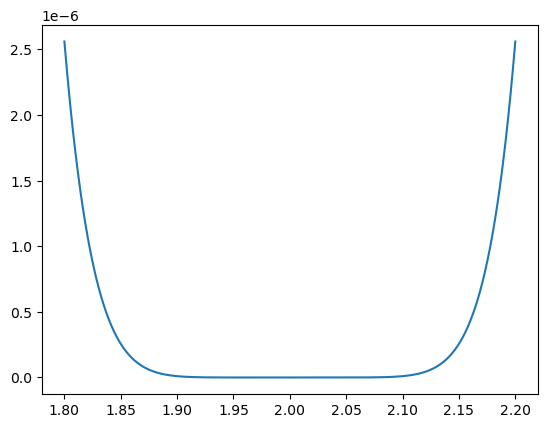

x= [1.9     1.90002 1.90004 ... 2.09996 2.09998 2.1    ]


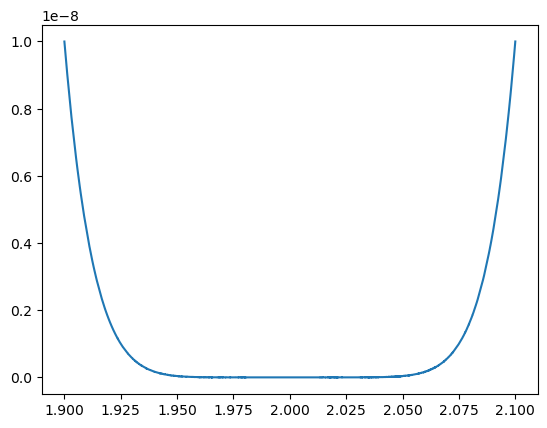

x= [1.92     1.920016 1.920032 ... 2.079968 2.079984 2.08    ]


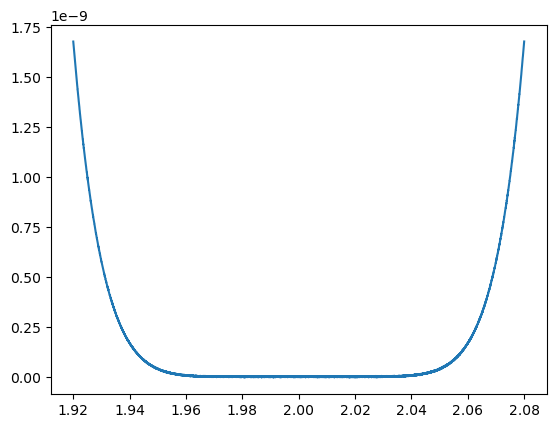

x= [1.93     1.930014 1.930028 ... 2.069972 2.069986 2.07    ]


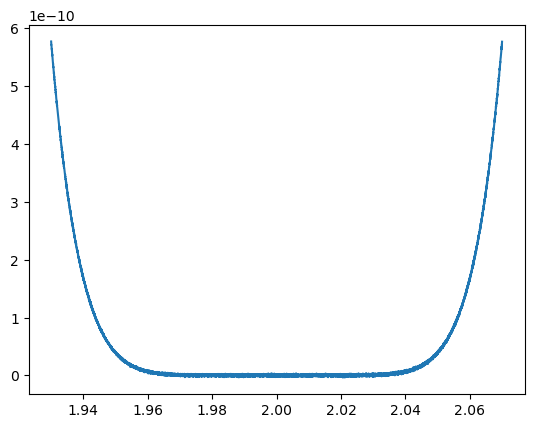

x= [1.94     1.940012 1.940024 ... 2.059976 2.059988 2.06    ]


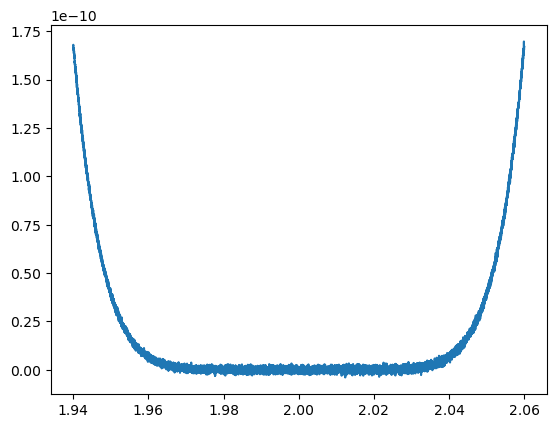

In [43]:
import numpy as np
import matplotlib.pyplot as plt

pol=np.array([1,-16,+112,-448,+1120,-1792,+1792,-1024,+256],dtype=float)
x1=np.linspace(1.8,2.2,10000)
x2=np.linspace(1.9,2.1,10000)
x3=np.linspace(1.92,2.08,10000)
x4=np.linspace(1.93,2.07,10000)
x5=np.linspace(1.94,2.06,10000)

solutions=np.array([x1,x2,x3,x4,x5])
for i in range(5):
    toDisplay=HornerValutation(pol,solutions[i])
    plt.plot(solutions[i],toDisplay)
    plt.show()
